### CAPSTONE PROJECT : Housing Sales Prices and Venue Analysis of Neighborhoods of Pune City, India.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0



geopy-1.21.0         | 58 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Sol

In [2]:
pune_data = "/resources/labs/DP0701EN/Pune Boroughs & Neighborhoods.csv"
df_pune = pd.read_csv(pune_data)

In [3]:
df_pune

,Borough,Neighborhood,Latitude,Longitude
0,Mundhwa - Magarpatta City,Amanora Park Town,18.521754,73.940587
1,Dhankawadi - Ambegaon Pathar,Ambegaon Pathar,18.458489,73.842559
2,Vadgaon Dhayari - Suncity,Anand Nagar,18.474473,73.822394
3,Pune Vidyapeeth - Wakdewadi,Ashok Nagar,18.550072,73.839188
4,Kharadi- Chandannagar,Ashoka Nagar,18.559982,73.942650
5,Aundh - Bopodi,Aundh,18.559488,73.803733
6,Mundhwa - Magarpatta City,B.T Kawade Road,18.518254,73.906662
7,Baner - Balewadi - Pashan,Balewadi,18.578653,73.770933
8,Baner - Balewadi - Pashan,Balewadi Gaon,18.576415,73.778786
9,Baner - Balewadi - Pashan,Balewadi Phata,18.569090,73.783903


In [4]:
df_pune.dtypes

Borough          object
Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

In [5]:
df_pune.isnull()

,Borough,Neighborhood,Latitude,Longitude
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [6]:
df_pune.isnull().sum()

Borough         0
Neighborhood    0
Latitude        0
Longitude       0
dtype: int64

In [7]:
df_pune.shape

(84, 4)

In [8]:
address = "Pune, MH"

geolocator = Nominatim(user_agent="pune_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Pune city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Pune city are 18.521428, 73.8544541.


In [9]:
# create map of Toronto using latitude and longitude values
map_pune = folium.Map(location=[latitude, longitude], zoom_start=10)
map_pune

In [10]:
df_pune=df_pune.dropna(subset=['Latitude'])
for lat, lng, borough, neighborhood in zip(
        df_pune['Latitude'], 
        df_pune['Longitude'], 
        df_pune['Borough'], 
        df_pune['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_pune)  

map_pune

In [11]:
CLIENT_ID = 'OBOZGQBJEIE4MRCNUFRE4PVM5OV53BTA3RPDH3HAROEXM0J3'
CLIENT_SECRET = 'NMB2GAN3M0GV5L0KQZGQFILQHJLPGD2UH0ZGCN2PCUNKEK0H'
VERSION = '20180605'

In [12]:
neighborhood_name = df_pune.loc[0, 'Neighborhood']
print(f"The first neighborhood's name is '{neighborhood_name}'.")

The first neighborhood's name is 'Amanora Park Town'.


In [13]:
neighborhood_latitude = df_pune.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_pune.loc[0, 'Longitude'] # neighborhood longitude value

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Amanora Park Town are 18.521754, 73.940587.


In [14]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

# get the result to a json file
results = requests.get(url).json()

In [15]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,categories,lat,lng
0,Crazy Noodles,Chinese Restaurant,18.518636,73.936016
1,Amanora Town Centre,Shopping Mall,18.518747,73.935204
2,INOX,Multiplex,18.518703,73.935990
3,Spaghetti Kitchen,Italian Restaurant,18.518721,73.934763
4,Dario's Espresso,Italian Restaurant,18.518689,73.936042
5,Starbucks,Coffee Shop,18.518861,73.934665
6,Barbeque Nation,BBQ Joint,18.518692,73.935896
7,Mainland China,Chinese Restaurant,18.518564,73.935173
8,Mad Over Donuts,Donut Shop,18.518777,73.934166
9,Zambar,Indian Restaurant,18.518637,73.935122


In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
pune_venues = getNearbyVenues(names=df_pune['Neighborhood'],
                                   latitudes=df_pune['Latitude'],
                                   longitudes=df_pune['Longitude']
                                  )

In [19]:
pune_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Amanora Park Town,18.521754,73.940587,Crazy Noodles,18.518636,73.936016,Chinese Restaurant
1,Amanora Park Town,18.521754,73.940587,Amanora Town Centre,18.518747,73.935204,Shopping Mall
2,Amanora Park Town,18.521754,73.940587,INOX,18.518703,73.935990,Multiplex
3,Amanora Park Town,18.521754,73.940587,Spaghetti Kitchen,18.518721,73.934763,Italian Restaurant
4,Amanora Park Town,18.521754,73.940587,Dario's Espresso,18.518689,73.936042,Italian Restaurant


In [20]:
pune_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Amanora Park Town,44,44,44,44,44,44
Ambegaon Pathar,5,5,5,5,5,5
Anand Nagar,7,7,7,7,7,7
Ashok Nagar,4,4,4,4,4,4
Ashoka Nagar,12,12,12,12,12,12
Aundh,100,100,100,100,100,100
B.T Kawade Road,4,4,4,4,4,4
Balewadi,11,11,11,11,11,11
Balewadi Gaon,48,48,48,48,48,48


In [21]:
print('There are {} uniques categories.'.format(len(pune_venues['Venue Category'].unique())))

There are 175 uniques categories.


In [22]:
# one hot encoding
pune_onehot = pd.get_dummies(pune_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
pune_onehot['Neighborhood'] = pune_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [pune_onehot.columns[-1]] + list(pune_onehot.columns[:-1])
pune_onehot = pune_onehot[fixed_columns]

pune_onehot.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Australian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Badminton Court,Bakery,Bank,Bar,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Candy Store,Cantonese Restaurant,Casino,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gastropub,General Entertainment,Go Kart Track,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Historic Site,Hobby Shop,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Liquor Store,Lounge,Maharashtrian Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Molecular Gastronomy Restaurant,Motel,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,Nightclub,North Indian Restaurant,Office,Organic Grocery,Other Great Outdoors,Other Nightlife,Paper / Office Supplies Store,Park,Parsi Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Punjabi Restaurant,Racetrack,Restaurant,River,Road,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Watch Shop,Wedding Hall,Wine Shop,Yoga Studio,Zoo
0,Amanora Park Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Amanora Park Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Amanora Park Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Amanora Park Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Amanora Park Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [23]:
pune_grouped = pune_onehot.groupby('Neighborhood').mean().reset_index()
pune_grouped.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Australian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Badminton Court,Bakery,Bank,Bar,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Candy Store,Cantonese Restaurant,Casino,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gastropub,General Entertainment,Go Kart Track,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Historic Site,Hobby Shop,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Liquor Store,Lounge,Maharashtrian Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Molecular Gastronomy Restaurant,Motel,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,Nightclub,North Indian Restaurant,Office,Organic Grocery,Other Great Outdoors,Other Nightlife,Paper / Office Supplies Store,Park,Parsi Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Punjabi Restaurant,Racetrack,Restaurant,River,Road,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Watch Shop,Wedding Hall,Wine Shop,Yoga Studio,Zoo
0,Amanora Park Town,0.0,0.0,0.0,0.022727,0.0,0.0,0.0,0.0,0.0,0.0,0.022727,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.022727,0.0,0.000000,0.022727,0.022727,0.0,0.0,0.0,0.022727,0.0,0.0,0.022727,0.0,0.0,0.068182,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.00,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.022727,0.0,0.0,0.068182,0.0,0.0,0.0,0.0,0.0,0.022727,0.0,0.0,0.022727,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.022727,0.0,0.090909,0.0,0.113636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.022727,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022727,0.00,0.0,0.0,0.0,0.022727,0.0,0.0,0.000000,0.0,0.0,0.0,0.022727,0.0,0.0,0.0,0.0,0.022727,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ambegaon Pathar,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.400000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = pune_grouped['Neighborhood']

for ind in np.arange(pune_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(pune_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amanora Park Town,Italian Restaurant,Bar,Donut Shop,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Coffee Shop,Department Store,Burger Joint,Bowling Alley
1,Ambegaon Pathar,Café,Convenience Store,Coffee Shop,Auto Workshop,Eastern European Restaurant,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Exhibit
2,Anand Nagar,Indian Restaurant,Pizza Place,Café,Fast Food Restaurant,Snack Place,Ice Cream Shop,Deli / Bodega,Farmers Market,Farm,Falafel Restaurant
3,Ashok Nagar,Playground,Pub,Café,Diner,Zoo,Dumpling Restaurant,Farm,Falafel Restaurant,Exhibit,English Restaurant
4,Ashoka Nagar,Restaurant,Pizza Place,Breakfast Spot,Hotel,Gym,Ice Cream Shop,Multicuisine Indian Restaurant,North Indian Restaurant,Go Kart Track,Tea Room


In [25]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

In [26]:
# set number of clusters
kclusters = 5

pune_grouped_clustering = pune_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(pune_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 4, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [27]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

pune_merged = df_pune

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
pune_merged = pune_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

pune_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mundhwa - Magarpatta City,Amanora Park Town,18.521754,73.940587,3,Italian Restaurant,Bar,Donut Shop,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Coffee Shop,Department Store,Burger Joint,Bowling Alley
1,Dhankawadi - Ambegaon Pathar,Ambegaon Pathar,18.458489,73.842559,4,Café,Convenience Store,Coffee Shop,Auto Workshop,Eastern European Restaurant,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Exhibit
2,Vadgaon Dhayari - Suncity,Anand Nagar,18.474473,73.822394,3,Indian Restaurant,Pizza Place,Café,Fast Food Restaurant,Snack Place,Ice Cream Shop,Deli / Bodega,Farmers Market,Farm,Falafel Restaurant
3,Pune Vidyapeeth - Wakdewadi,Ashok Nagar,18.550072,73.839188,3,Playground,Pub,Café,Diner,Zoo,Dumpling Restaurant,Farm,Falafel Restaurant,Exhibit,English Restaurant
4,Kharadi- Chandannagar,Ashoka Nagar,18.559982,73.942650,3,Restaurant,Pizza Place,Breakfast Spot,Hotel,Gym,Ice Cream Shop,Multicuisine Indian Restaurant,North Indian Restaurant,Go Kart Track,Tea Room


In [28]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
        pune_merged['Latitude'], 
        pune_merged['Longitude'], 
        pune_merged['Neighborhood'], 
        pune_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [29]:
pune_merged.loc[pune_merged['Cluster Labels'] == 0, pune_merged.columns[[1] + list(range(5, pune_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Camp,Indian Restaurant,Fast Food Restaurant,Breakfast Spot,Ice Cream Shop,Chinese Restaurant,Bar,Snack Place,Coffee Shop,Bakery,Juice Bar
31,Kale Padal,ATM,Indian Restaurant,Fast Food Restaurant,Juice Bar,Deli / Bodega,Eastern European Restaurant,Cupcake Shop,Farmers Market,Farm,Falafel Restaurant
35,Keshav Nagar,Hotel,Indian Restaurant,Dumpling Restaurant,Fish Market,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Exhibit,English Restaurant
43,Lohgaon,ATM,Indian Restaurant,Dumpling Restaurant,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Exhibit,English Restaurant,Electronics Store
46,Manjri Budruk,ATM,Mobile Phone Shop,Indian Restaurant,Art Gallery,Eastern European Restaurant,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Exhibit
50,Mohammed Wadi,Indian Restaurant,ATM,Boutique,Italian Restaurant,Eastern European Restaurant,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Exhibit
53,Narhe,Indian Restaurant,ATM,Snack Place,Gym,Dumpling Restaurant,Farmers Market,Farm,Falafel Restaurant,Exhibit,English Restaurant
72,Thite Nagar,Indian Restaurant,Fast Food Restaurant,North Indian Restaurant,Multicuisine Indian Restaurant,Thai Restaurant,Hookah Bar,Punjabi Restaurant,Pizza Place,Hotel,Donut Shop


In [30]:
pune_merged.loc[pune_merged['Cluster Labels'] == 1, pune_merged.columns[[1] + list(range(5, pune_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
64,Salisbury Park,Fast Food Restaurant,Shopping Mall,Men's Store,Coffee Shop,Multiplex,Donut Shop,Gastropub,Mobile Phone Shop,Pizza Place,Hotel
67,Sasane Nagar,Fast Food Restaurant,Pizza Place,Farmers Market,Breakfast Spot,Deli / Bodega,Department Store,Fish Market,Cupcake Shop,Dance Studio,Farm
69,Shivane,Pizza Place,Market,Fish Market,Farmers Market,Farm,Falafel Restaurant,Exhibit,English Restaurant,Electronics Store,Eastern European Restaurant
78,Vishrantwadi,Shopping Mall,Fast Food Restaurant,Pizza Place,Indian Restaurant,Chinese Restaurant,Snack Place,Tea Room,Dumpling Restaurant,Farmers Market,Farm


In [31]:
pune_merged.loc[pune_merged['Cluster Labels'] == 2, pune_merged.columns[[1] + list(range(5, pune_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Handewadi,ATM,Fast Food Restaurant,Bar,Lake,Electronics Store,Fish Market,Farmers Market,Farm,Falafel Restaurant,Exhibit
52,Mundhwa,Fast Food Restaurant,Train Station,Fruit & Vegetable Store,Eastern European Restaurant,Zoo,Dumpling Restaurant,Farmers Market,Farm,Falafel Restaurant,Exhibit


In [32]:
pune_merged.loc[pune_merged['Cluster Labels'] == 3, pune_merged.columns[[1] + list(range(5, pune_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amanora Park Town,Italian Restaurant,Bar,Donut Shop,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Coffee Shop,Department Store,Burger Joint,Bowling Alley
2,Anand Nagar,Indian Restaurant,Pizza Place,Café,Fast Food Restaurant,Snack Place,Ice Cream Shop,Deli / Bodega,Farmers Market,Farm,Falafel Restaurant
3,Ashok Nagar,Playground,Pub,Café,Diner,Zoo,Dumpling Restaurant,Farm,Falafel Restaurant,Exhibit,English Restaurant
4,Ashoka Nagar,Restaurant,Pizza Place,Breakfast Spot,Hotel,Gym,Ice Cream Shop,Multicuisine Indian Restaurant,North Indian Restaurant,Go Kart Track,Tea Room
5,Aundh,Indian Restaurant,Dessert Shop,Restaurant,Café,Ice Cream Shop,Shopping Mall,Sandwich Place,Snack Place,South Indian Restaurant,Bakery
6,B.T Kawade Road,Food Truck,Indian Restaurant,Shopping Mall,Electronics Store,Zoo,Dumpling Restaurant,Farmers Market,Farm,Falafel Restaurant,Exhibit
7,Balewadi,Brewery,Pizza Place,Italian Restaurant,Coffee Shop,Café,Fast Food Restaurant,French Restaurant,Breakfast Spot,Asian Restaurant,Indian Restaurant
8,Balewadi Gaon,Café,Asian Restaurant,Indian Restaurant,Brewery,Bar,Coffee Shop,Bistro,Sports Club,Vegetarian / Vegan Restaurant,Breakfast Spot
9,Balewadi Phata,Indian Restaurant,Café,Breakfast Spot,Convenience Store,Motorcycle Shop,Brewery,Sandwich Place,Coffee Shop,Pizza Place,Fast Food Restaurant
10,Balewadi Stadium,Indian Restaurant,Stadium,Restaurant,Concert Hall,Café,Bed & Breakfast,Diner,Shopping Mall,Hotel,Dim Sum Restaurant


In [33]:
pune_merged.loc[pune_merged['Cluster Labels'] == 4, pune_merged.columns[[1] + list(range(5, pune_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Ambegaon Pathar,Café,Convenience Store,Coffee Shop,Auto Workshop,Eastern European Restaurant,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Exhibit
60,Raghav Nagar-Vadgaon Budruk,Café,Art Gallery,Garden,Auto Workshop,Zoo,Eastern European Restaurant,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
83,Yewale Wadi,Café,Breakfast Spot,Fast Food Restaurant,Creperie,Fish Market,Farmers Market,Farm,Falafel Restaurant,Exhibit,English Restaurant


In [34]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In [35]:
df = pune_venues.groupby('Neighborhood').count()

In [36]:
df

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Amanora Park Town,44,44,44,44,44,44
Ambegaon Pathar,5,5,5,5,5,5
Anand Nagar,7,7,7,7,7,7
Ashok Nagar,4,4,4,4,4,4
Ashoka Nagar,12,12,12,12,12,12
Aundh,100,100,100,100,100,100
B.T Kawade Road,4,4,4,4,4,4
Balewadi,11,11,11,11,11,11
Balewadi Gaon,48,48,48,48,48,48


In [37]:
df.drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude','Venue Category'], axis=1, inplace=True)

In [38]:
df

,Venue
Neighborhood,
Amanora Park Town,44
Ambegaon Pathar,5
Anand Nagar,7
Ashok Nagar,4
Ashoka Nagar,12
Aundh,100
B.T Kawade Road,4
Balewadi,11
Balewadi Gaon,48


In [39]:
df.sort_values(['Venue'], ascending=True, axis=0, inplace=True)
df

,Venue
Neighborhood,
Shivane,2
Keshav Nagar,2
Yewale Wadi,4
Handewadi,4
Kale Padal,4
Bhugaon,4
Dhanori,4
Lohgaon,4
Yerawada,4


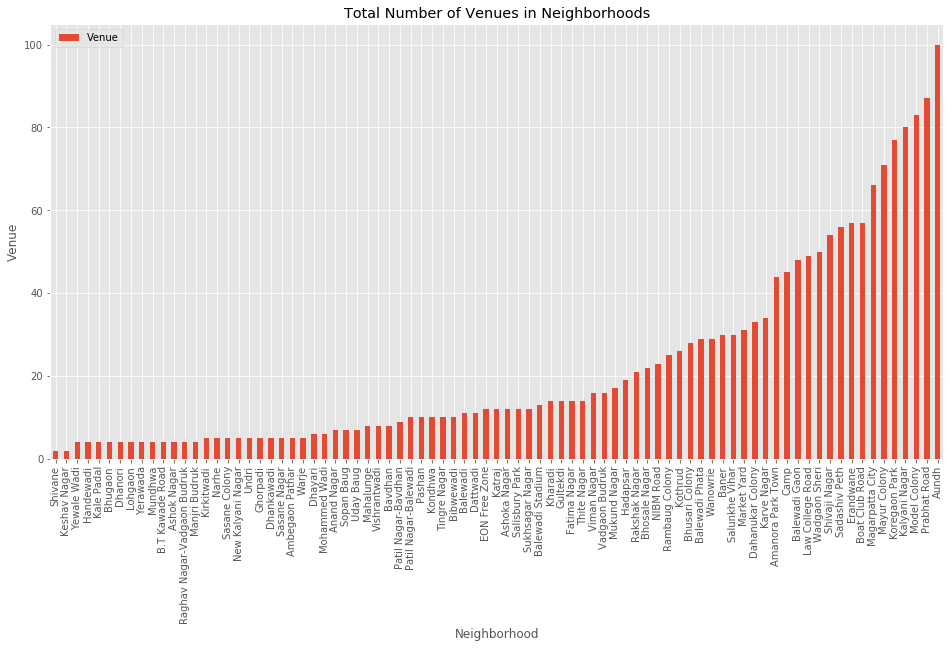

In [40]:
df.plot(kind='bar', figsize=(16, 8))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Venue') # add y-label to the plot
plt.title('Total Number of Venues in Neighborhoods') # add title to the plot

plt.show()

In [41]:
pune_prop_rates = "/resources/labs/DP0701EN/Pune Boroughs_Property Rates.csv"
df_pune_prop_rates = pd.read_csv(pune_prop_rates)

In [42]:
df_pune_prop_rates

,Borough,Neighbourhood,Average Price (Rs./Sq-ft)
0,Mundhwa - Magarpatta City,Amanora Park Town,8163
1,Dhankawadi - Ambegaon Pathar,Ambegaon Pathar,4609
2,Vadgaon Dhayari - Suncity,Anand Nagar,6338
3,Pune Vidyapeeth - Wakdewadi,Ashok Nagar,12126
4,Kharadi- Chandannagar,Ashoka Nagar,6768
5,Aundh - Bopodi,Aundh,9205
6,Mundhwa - Magarpatta City,B.T Kawade Road,7443
7,Baner - Balewadi - Pashan,Balewadi,6959
8,Baner - Balewadi - Pashan,Balewadi Gaon,7084
9,Baner - Balewadi - Pashan,Balewadi Phata,7521


In [43]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_pune_prop_rates['Average Price (Rs./Sq-ft)'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[16 16 19  8  8  4  5  4  2  2]
[ 4362.  5477.  6592.  7707.  8822.  9937. 11052. 12167. 13282. 14397.
 15512.]


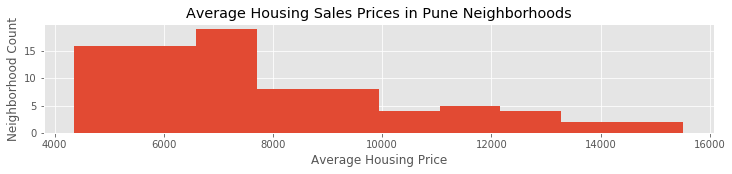

In [44]:
df_pune_prop_rates['Average Price (Rs./Sq-ft)'].plot(kind='hist', figsize=(12, 2))

plt.title('Average Housing Sales Prices in Pune Neighborhoods') # add a title to the histogram
plt.ylabel('Neighborhood Count') # add y-label
plt.xlabel('Average Housing Price') # add x-label

plt.show()


In [45]:
df_pune_prop_rates.drop(['Borough'], axis=1, inplace=True)

In [46]:
df_pune_prop_rates

,Neighbourhood,Average Price (Rs./Sq-ft)
0,Amanora Park Town,8163
1,Ambegaon Pathar,4609
2,Anand Nagar,6338
3,Ashok Nagar,12126
4,Ashoka Nagar,6768
5,Aundh,9205
6,B.T Kawade Road,7443
7,Balewadi,6959
8,Balewadi Gaon,7084
9,Balewadi Phata,7521


In [47]:
df_pune_prop_rates.set_index('Neighbourhood', inplace=True)

In [48]:
df_pune_prop_rates

,Average Price (Rs./Sq-ft)
Neighbourhood,
Amanora Park Town,8163
Ambegaon Pathar,4609
Anand Nagar,6338
Ashok Nagar,12126
Ashoka Nagar,6768
Aundh,9205
B.T Kawade Road,7443
Balewadi,6959
Balewadi Gaon,7084


In [49]:
df_pune_prop_rates.sort_values(['Average Price (Rs./Sq-ft)'], ascending=True, axis=0, inplace=True)
df_pune_prop_rates

,Average Price (Rs./Sq-ft)
Neighbourhood,
Handewadi,4362
Shivane,4397
Kirkitwadi,4446
Kale Padal,4607
Ambegaon Pathar,4609
Raghav Nagar-Vadgaon Budruk,4645
Narhe,4808
Sasane Nagar,4853
Dhayari,4969


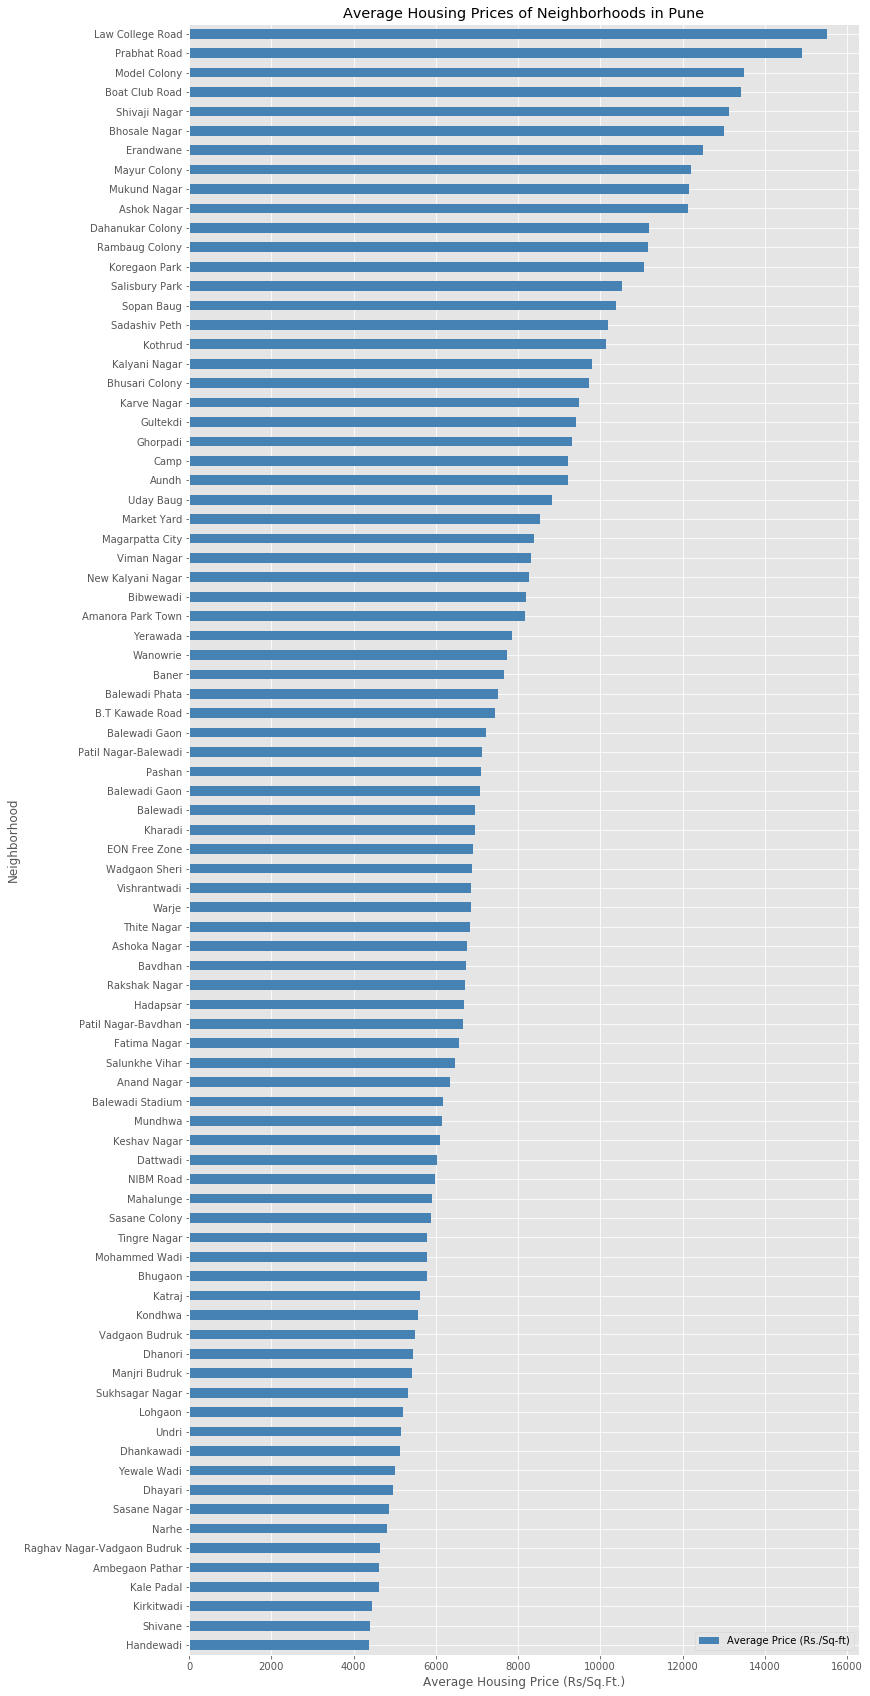

In [50]:
df_pune_prop_rates.plot(kind='barh', figsize=(12, 30), color = 'steelblue')

plt.xlabel('Average Housing Price (Rs/Sq.Ft.)') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Average Housing Prices of Neighborhoods in Pune') # add title to the plot

plt.show()